## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# # Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice.
mouse_data['Mouse ID'].nunique()

249

In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
md_duplicates = mouse_data[mouse_data.duplicated(['Mouse ID','Timepoint'])]
md_duplicates['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
# md_duplicates
mouse_data.loc[mouse_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# drop_df = mouse_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
# clean_df = pd.DataFrame(drop_df)
# clean_df
clean_df = mouse_data.loc[mouse_data['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice in the clean DataFrame.
mice_unique = clean_df['Mouse ID'].unique()
len(mice_unique)

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group = clean_df.groupby(["Drug Regimen"])

drug_group_mean = drug_group['Tumor Volume (mm3)'].mean()
drug_group_median = drug_group['Tumor Volume (mm3)'].median()
drug_group_var = drug_group['Tumor Volume (mm3)'].var()
drug_group_std = drug_group['Tumor Volume (mm3)'].std()
drug_group_SEM = drug_group['Tumor Volume (mm3)'].sem()

drug_group_dict = {
    "Mean": drug_group_mean,
    "Median":drug_group_median,
    "Variance":drug_group_var,
    "STD":drug_group_std,
    "SEM":drug_group_SEM,
}

drug_summary_df = pd.DataFrame(drug_group_dict)
drug_summary_df


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Tests')

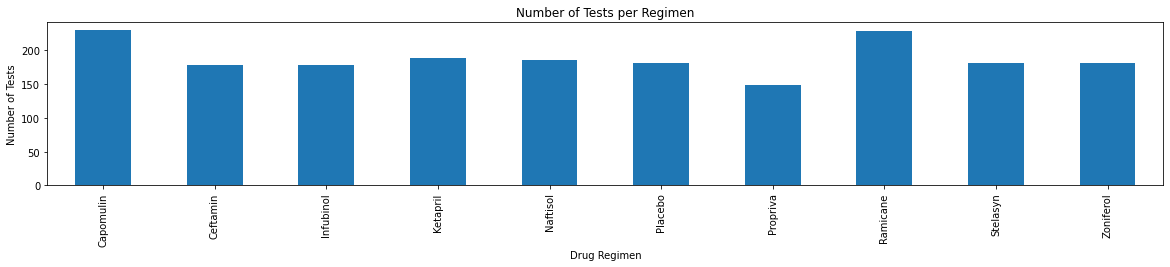

In [36]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group_plot = drug_group['Mouse ID'].count()
drug_group_plot.plot(kind="bar", figsize=(20,3))
# drug_group_plot.set_xlabel("Drug Regimen")
# drug_group_plot.set_ylabel("Number of Tests")
plt.title("Number of Tests per Regimen")
plt.ylabel("Number of Tests")

Text(0, 0.5, 'Number of Tests')

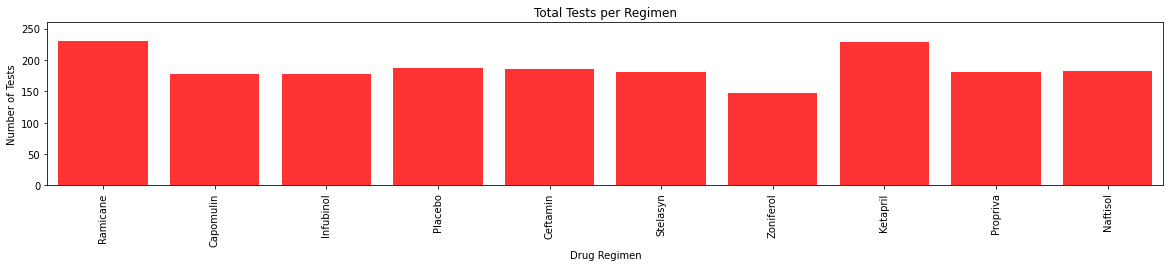

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# clean_df["Drug Regimen"].value_counts()
# drug_group_plot
x_axis = np.arange(len(drug_group_plot))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, drug_group_plot, color='r', alpha=0.8, align="center")
plt.xticks(tick_locations, clean_df['Drug Regimen'].unique(), rotation="vertical")
plt.xlim(-.5, len(x_axis)-.5)
plt.ylim(0, max(drug_group_plot)+30)
plt.title("Total Tests per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tests")

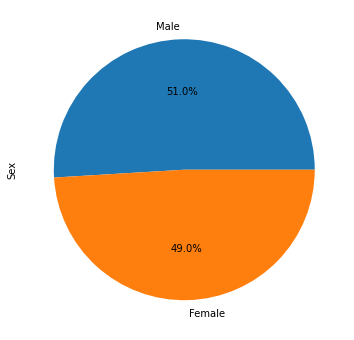

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
plot = gender_count.plot.pie(figsize=(6, 6), autopct="%1.1f%%")

Text(0.0, 1.0, 'Sex')

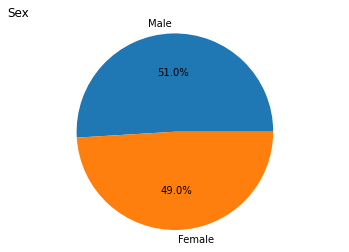

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ['Male','Female']
plt.pie(gender_count, labels=sexes, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Sex", loc='left')

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_df.groupby(['Mouse ID'])
mouse_max = mouse_group['Timepoint'].max()
mouse_max_df = pd.DataFrame(mouse_max)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merge = pd.merge(clean_df, mouse_max_df, on='Mouse ID')
tumor_vol_loc = mouse_merge.loc[(mouse_merge['Timepoint_x'] == mouse_merge['Timepoint_y'])]
tumor_vol_df = tumor_vol_loc[['Mouse ID','Tumor Volume (mm3)','Drug Regimen']]
tumor_vol_df

,Mouse ID,Tumor Volume (mm3),Drug Regimen
9,k403,22.050126,Ramicane
19,s185,23.343598,Capomulin
29,x401,28.484033,Capomulin
39,m601,28.430964,Capomulin
49,g791,29.128472,Ramicane
...,...,...,...
1846,z314,45.934712,Stelasyn
1849,z435,48.710661,Propriva
1859,z581,62.754451,Infubinol
1869,z795,65.741070,Naftisol


In [41]:
# plt.hist(tumor_vol_df['Tumor Volume (mm3)'])

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in tumor_vol_df:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    filtered = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == treatment_list[0]]
    tumor_vol_list.append(filtered)
    
    filtered = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == treatment_list[1]]
    tumor_vol_list.append(filtered)
    
    filtered = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == treatment_list[2]]
    tumor_vol_list.append(filtered)
    
    filtered = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == treatment_list[3]]
    tumor_vol_list.append(filtered)
   
    # add subset 

    # Determine outliers using upper and lower bounds


In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig1, ax1 = plt.subplots()
# ax1.set_ylabel('Tumor Size')
# ax1.boxplot(tumor_vol_list)
# plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = drug_group['Capomulin']
x_axis = np.arange[drug_group['timepoint'].unique()]
y_axis = capomulin['Tumor Volume (mm3)'].mean()
plt.plot(x_axis, y_axis)

KeyError: 'Column not found: Capomulin'

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
